# Installation

```python
pip install transformers # not needed in Colab
```

# Pipeline Abstraction

## Natural Language Processing (NLP) Pipelines

### Text Classification
This is often the "hello, world" of transformers. The pipeline classifies a piece of text into a set of predefined categories. The most common use is sentiment analysis, which determines if a text is positive, negative, or neutral.

In [1]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
result = classifier("This is not okay thing to do.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.999752938747406}]


Before we move ahead, let's understand the what is printed in the console.

* **Default Model Loaded**: Since we didn't specify a particular model, so the system defaulted to loading **`distilbert-base-uncased-finetuned-sst-2-english`**. This is a popular model for sentiment analysis.
* **Authentication Warning**: We're seeing a `UserWarning` because we haven't authenticated with Hugging Face using a secret token (`HF_TOKEN`). While not required for public models, it's recommended practice, especially for private models or for tracking usage.
* **Model Download**: The green progress bars show the successful download of the model's components. This includes the model's architecture (`config.json`), its trained weights (`model.safetensors`), and the tokenizer files (`tokenizer_config.json`, `vocab.txt`) which prepare text for the model.
* **Hardware Allocation**: The final line, `Device set to use cpu`, indicates that the model will run on the Central Processing Unit (CPU) of the machine. For larger models, a GPU or TPU would provide a significant speed-up.
* **Model Prediciton**: The output is a list containing a dictionary with the predicted label and its corresponding confidence score.


### Text Generation

This pipeline takes a starting prompt and generates subsequent text, making it useful for creative writing, code completion, or chatbot responses.

In [2]:
from transformers import pipeline
generator = pipeline("text-generation", model="gpt2")
result = generator("In a world where AI is king,", max_length=30, num_return_sequences=1)
print(result)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In a world where AI is king, the U.S. government plans to use artificial intelligence to build an AI system that will use human intelligence to drive cars and airplanes. The program would be run by the National Highway Traffic Safety Administration, which would be led by a U.S. Department of Transportation employee.\n\nThe program would involve using information about drivers, such as the amount of time they\'ve been driving, to get a driver to stop, and then to complete a short-term test to see how much human intelligence would be able to help.\n\nThe program would also use computers to help engineers build software that could help police and firefighters identify people who might be in serious trouble based on a specific type of criminal or illegal activity.\n\nAdvertisement\n\nThe program would also be used to help people who are at a risk of being arrested for a violent crime with a warrant or other form of identification, which would help people who have been 

### Question Answering
This pipeline extracts an answer to a question from a given context paragraph. It does not generate new text but identifies the span of text within the context that best answers the question.

In [3]:
from transformers import pipeline
qa_pipeline = pipeline("question-answering")
context = "The Hugging Face pipeline abstraction simplifies using models for inference."
question = "What does the pipeline abstraction simplify?"
result = qa_pipeline(question=question, context=context)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'score': 0.5052773952484131, 'start': 55, 'end': 75, 'answer': 'models for inference'}


### Summarization
This pipeline condenses a long piece of text into a shorter, concise summary, capturing the main points.

In [4]:
summarizer = pipeline("summarization")
article = """The red fox, a creature of cunning and adaptability, is a common sight in both rural and urban environments. Despite its name, this mammal can be found in a variety of colors, including silver, black, and other variations. The most iconic morph, however, presents a fiery red coat that contrasts sharply with its white underbelly, black-tipped ears, and dark legs. Its long, bushy tail, often tipped with a distinctive white blaze, serves multiple purposes: as a warm covering in cold weather, a signal flag to other foxes, and a counterbalance for agile maneuvering.
Scientifically known as Vulpes vulpes, the red fox boasts the widest geographical distribution of any member of the order Carnivora. Its range extends across the entire Northern Hemisphere, from the Arctic Circle to North Africa, North America, and Eurasia. This remarkable success is a testament to its incredible ability to thrive in a vast array of habitats, from dense forests and open grasslands to harsh deserts and even the heart of bustling cities. In recent decades, red foxes have become increasingly common in suburban and urban areas, where they have proven adept at navigating human-dominated landscapes and exploiting new food sources.
The diet of the red fox is as varied as its habitat. An opportunistic omnivore, it preys primarily on small rodents like mice and voles, as well as rabbits, squirrels, and birds. However, it will readily supplement its diet with fruits, berries, insects, and carrion. In urban settings, foxes are notorious for scavenging from garbage cans and compost heaps, a behavior that highlights their resourcefulness. Their hunting techniques are a marvel of instinct and intelligence. With keen hearing, they can locate prey moving underground and will often perform a characteristic high pounce, leaping into the air to surprise and pin down their meal.
Socially, red foxes are generally solitary hunters, though they live in small family groups in underground dens, often referred to as "earths." These dens can be complex, with multiple entrances and chambers, and are sometimes inherited and expanded over generations. A dominant pair, the dog fox and the vixen, will mate for life and raise a litter of kits each spring. The kits, born blind and deaf, are cared for by both parents and sometimes by older siblings from a previous litter who act as "helpers." By autumn, the young foxes will have dispersed to establish their own territories.
The relationship between humans and red foxes is complex and multifaceted. In many cultures, the fox is a symbol of cunning and trickery, a prominent figure in folklore and fables. While they can be a nuisance to farmers due to occasional predation on poultry, they also play a crucial role in controlling populations of agricultural pests. Their growing presence in cities has led to a mixture of delight and concern, with many people enjoying the sight of these wild creatures while others worry about potential conflicts. Regardless of human perception, the red fox continues to demonstrate a remarkable resilience, a testament to its evolutionary prowess and its ability to adapt to a changing world.
"""
result = summarizer(article, max_length=50, min_length=25, do_sample=False)
print(result)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'summary_text': ' The red fox boasts the widest geographical distribution of any member of the order Carnivora . Its range extends across the entire Northern Hemisphere, from the Arctic Circle to North Africa, North America, and Eurasia . In urban settings, fox'}]


### Translation
The pipeline can translate text from a source language to a target language. The task identifier follows the format `translation_{src}_to_{tgt}`.

In [5]:
from transformers import pipeline
translator = pipeline("translation_en_to_fr")
result = translator("Transformers are powerful.")
print(result)

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'translation_text': 'Les transformateurs sont puissants.'}]


### Token Classification (Named Entity Recognition - NER)
This pipeline, identified by "ner" or "token-classification", classifies each token in a sentence into a category, such as a person (`PER`), organization (`ORG`), or location (`LOC`).

In [6]:
from transformers import pipeline
ner_pipeline = pipeline("ner")
result = ner_pipeline("Hugging Face Inc. is a company based in New York City.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'entity': 'I-ORG', 'score': np.float32(0.9992662), 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}, {'entity': 'I-ORG', 'score': np.float32(0.9808883), 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}, {'entity': 'I-ORG', 'score': np.float32(0.99536246), 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}, {'entity': 'I-ORG', 'score': np.float32(0.9993383), 'index': 4, 'word': 'Inc', 'start': 13, 'end': 16}, {'entity': 'I-LOC', 'score': np.float32(0.9990269), 'index': 11, 'word': 'New', 'start': 40, 'end': 43}, {'entity': 'I-LOC', 'score': np.float32(0.9988483), 'index': 12, 'word': 'York', 'start': 44, 'end': 48}, {'entity': 'I-LOC', 'score': np.float32(0.9991774), 'index': 13, 'word': 'City', 'start': 49, 'end': 53}]


### Fill-Mask
Given a text with a masked token (e.g., <mask>), this pipeline predicts the most likely words to fill that mask.

In [7]:
from transformers import pipeline
unmasker = pipeline("fill-mask")
result = unmasker("The capital of <mask> is Paris.")
print(result)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'score': 0.5139005184173584, 'token': 1005, 'token_str': ' Europe', 'sequence': 'The capital of Europe is Paris.'}, {'score': 0.323322057723999, 'token': 1470, 'token_str': ' France', 'sequence': 'The capital of France is Paris.'}, {'score': 0.016538726165890694, 'token': 730, 'token_str': ' America', 'sequence': 'The capital of America is Paris.'}, {'score': 0.014298939146101475, 'token': 31478, 'token_str': ' globalization', 'sequence': 'The capital of globalization is Paris.'}, {'score': 0.005346512887626886, 'token': 2201, 'token_str': ' Paris', 'sequence': 'The capital of Paris is Paris.'}]


### Zero-Shot Classification
This is one of the most powerful and flexible pipelines. It allows you to classify text using any set of candidate labels you provide on the fly, without the model having been explicitly trained on those specific labels.

In [8]:
from transformers import pipeline
zero_shot_classifier = pipeline("zero-shot-classification")
sequence = "Who are you voting for in 2024?"
candidate_labels = ["politics", "business", "technology"]
result = zero_shot_classifier(sequence, candidate_labels)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'sequence': 'Who are you voting for in 2024?', 'labels': ['politics', 'technology', 'business'], 'scores': [0.9286003708839417, 0.03690174221992493, 0.034497883170843124]}


## Computer Vision, Audio, and Multimodal Pipelines

The pipeline abstraction extends seamlessly to modalities beyond text, demonstrating its versatility.


#### Code to download cat image - IGNORE

In [9]:
! pip install requests

In [11]:
import requests

image_url = "https://commons.wikimedia.org/wiki/Special:FilePath/Cat_August_2010-4.jpg"

headers = {
    "User-Agent": "Mozilla/5.0 (compatible; MyBot/1.0; +https://example.com)"
}

print("Downloading image...")
response = requests.get(image_url, headers=headers)
response.raise_for_status()

with open("cat.jpg", "wb") as f:
    f.write(response.content)

print("Success! Image saved as cat.jpg")


Success! Image saved as cat.jpg


### Image Classification
Assigns a label to an entire image from a set of predefined classes.

In [12]:
from transformers import pipeline
image_classifier = pipeline("image-classification")
result = image_classifier("/content/cat.jpg")
print(result)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


[{'label': 'Egyptian cat', 'score': 0.8821499347686768}, {'label': 'tabby, tabby cat', 'score': 0.07465515285730362}, {'label': 'tiger cat', 'score': 0.03799121454358101}, {'label': 'lynx, catamount', 'score': 0.0009538873564451933}, {'label': 'tiger, Panthera tigris', 'score': 0.00010449585533933714}]


### Object Detection
Identifies multiple objects within an image and returns their class labels along with bounding box coordinates.

In [13]:
from transformers import pipeline
object_detector = pipeline("object-detection")
result = object_detector("/content/cat.jpg")
print(result)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


[{'score': 0.9987272620201111, 'label': 'cat', 'box': {'xmin': 176, 'ymin': 456, 'xmax': 3496, 'ymax': 1946}}, {'score': 0.5731998085975647, 'label': 'car', 'box': {'xmin': 156, 'ymin': 1329, 'xmax': 3633, 'ymax': 2202}}]


### Image Segmentation
Classifies each pixel in an image into a category.

In [14]:
from transformers import pipeline
object_detector = pipeline("image-segmentation")
result = object_detector("/content/cat.jpg")
print(result)

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision d53b52a (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

Device set to use cuda:0


model.safetensors:   0%|          | 0.00/172M [00:00<?, ?B/s]

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.998772, 'label': 'LABEL_199', 'mask': <PIL.Image.Image image mode=L size=3640x2226 at 0x7C458CE63B30>}, {'score': 0.999483, 'label': 'cat', 'mask': <PIL.Image.Image image mode=L size=3640x2226 at 0x7C458CE60290>}]


Label: LABEL_199, Score: 0.9988


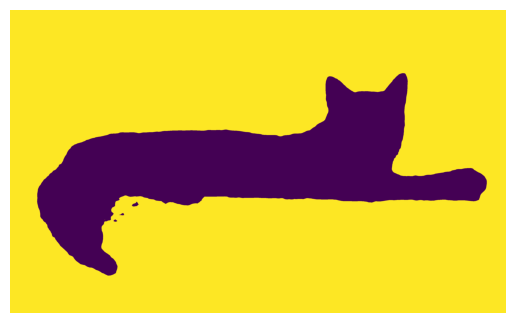

Label: cat, Score: 0.9995


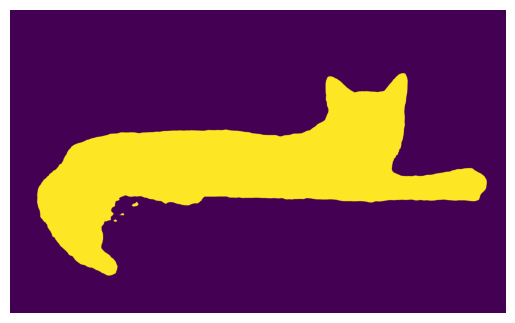

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

for item in result:
    if 'mask' in item and isinstance(item['mask'], Image.Image):
        print(f"Label: {item.get('label', 'N/A')}, Score: {item.get('score', 'N/A'):.4f}")
        plt.imshow(item['mask'])
        plt.axis('off')
        plt.show()

# Pipeline Tasks Overview

|Modality       |Task Identifier             |Task Aliases      |Description                                        |Expected Input(s)                    |Sample Output Structure                                      |
|---------------|----------------------------|------------------|---------------------------------------------------|-------------------------------------|-------------------------------------------------------------|
|NLP            |text-classification         |sentiment-analysis|Classifies a sequence into a set of labels.        |str or List[str]                     |[{'label': str, 'score': float}]                             |
|NLP            |token-classification        |ner               |Classifies each token in a sequence.               |str or List[str]                     |[{'entity': str, 'score': float, 'word': str,...}]           |
|NLP            |question-answering          |                  |Extracts an answer span from a context.            |Dict{'question': str, 'context': str}|{'score': float, 'start': int, 'end': int, 'answer': str}    |
|NLP            |fill-mask                   |                  |Predicts a masked token in a sequence.             |str or List[str] with a mask token   |[{'score': float, 'token_str': str,...}]                     |
|NLP            |summarization               |                  |Generates a concise summary of a long text.        |str or List[str]                     |[{'summary_text': str}]                                      |
|NLP            |translation_xx_to_yy        |                  |Translates text from language xx to yy.            |str or List[str]                     |[{'translation_text': str}]                                  |
|NLP            |text-generation             |                  |Generates text following a prompt.                 |str or List[str]                     |[{'generated_text': str}]                                    |
|NLP            |zero-shot-classification    |                  |Classifies a sequence using arbitrary labels.      |str, candidate_labels=List[str]      |{'sequence': str, 'labels': List[str], 'scores': List[float]}|
|NLP            |feature-extraction          |                  |Converts text into a dense vector representation.  |str or List[str]                     |List[List[float]] or np.ndarray                              |
|Computer Vision|image-classification        |                  |Classifies an entire image.                        |Image path, URL, or PIL.Image        |[{'score': float, 'label': str}]                             |
|Computer Vision|object-detection            |                  |Detects objects with bounding boxes in an image.   |Image path, URL, or PIL.Image        |                                                           |
|Computer Vision|image-segmentation          |                  |Classifies each pixel in an image into a category. |Image path, URL, or PIL.Image        |[{'score': float, 'label': str, 'mask': PIL.Image}]          |
|Computer Vision|image-to-text               |                  |Generates a caption for an image.                  |Image path, URL, or PIL.Image        |[{'generated_text': str}]                                    |
|Audio          |audio-classification        |                  |Classifies an audio snippet.                       |Audio path, URL, or raw waveform     |[{'score': float, 'label': str}]                             |
|Audio          |automatic-speech-recognition|                  |Transcribes speech from an audio file to text.     |Audio path, URL, or raw waveform     |{'text': str}                                                |
|Audio          |text-to-speech              |                  |Converts text into a spoken audio waveform.        |str                                  |np.ndarray (waveform), int (sampling rate)                   |
|Multimodal     |document-question-answering |                  |Answers a question based on an image of a document.|image, question                      |[{'score': float, 'answer': str,...}]                        |
|Multimodal     |visual-question-answering   |                  |Answers a question based on a general image.       |image, question                      |[{'score': float, 'answer': str}]                            |


# Beyond the Defaults

When a pipeline is instantiated with only a task identifier, it loads a default, general-purpose model for that task. For example,  `pipeline("sentiment-analysis")` might load a model like `distilbert-base-uncased-finetuned-sst-2-english`. While competent, this model may not be the best choice for text from a specific domain (e.g., legal documents, scientific papers) or in a language other than English.

For superior performance, it is often necessary to select a model from the Hugging Face Hub that has been specifically fine-tuned on a more relevant dataset. This is achieved by passing the model's Hub identifier to the   `model` parameter during pipeline initialization - the one that we saw on the Models Hub.

For instance, to perform sentiment analysis on multilingual product reviews, one could select a model trained for that specific purpose:

In [16]:
from transformers import pipeline

# Using a model fine-tuned on multilingual reviews
multi_lang_classifier = pipeline(
    task="sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)
multi_lang_classifier("Ce produit est absolument fantastique!")

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': '5 stars', 'score': 0.9075827598571777}]

Similarly, if an application requires high accuracy and generalization across diverse English text formats like tweets and reviews, a model like `siebert`/`sentiment-roberta-large-english` might be a better choice due to its training on 15 different datasets.

In [17]:
# Using a model designed for high generalization
roberta_classifier = pipeline(
    task="sentiment-analysis",
    model="siebert/sentiment-roberta-large-english"
)
roberta_classifier("This movie was a masterpiece, but the book was even better.")

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9987836480140686}]

In [19]:
from transformers import pipeline
gpu_generator = pipeline("text-generation", model="gpt2", device=0)

Device set to use cuda:0


In most cases, the pipeline correctly infers the appropriate tokenizer to use from the specified model. However, in advanced scenarios, such as when using a `model` and `tokenizer` that are not stored under the same identifier on the Hub, one can explicitly specify the tokenizer using the tokenizer parameter. This ensures that the text pre-processing is perfectly aligned with the model's expectations.

In [20]:
# Explicitly specifying both model and tokenizer
feature_extractor = pipeline(
    "feature-extraction",
    model="distilbert-base-uncased",
    tokenizer="distilbert-base-uncased"
)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cuda:0


#### Hardware Configuration

The `device` parameter allows for explicit placement of the model onto a specific hardware device.

`device=-1` : This is the default setting, which allocates the model to the CPU.

`device=0` : This places the model on the first available CUDA-enabled GPU (identified as CUDA device 0). If you have multiple GPUs, you can use `device=1`, `device=2`, and so on.

```python
# Running a text generation pipeline on the first GPU
gpu_generator = pipeline("text-generation", model="gpt2", device=0)
```

##### Most common and useful task-specific parameters:

For Text Generation (`text-generation`):
- `max_length` (int): Sets the maximum length of the generated sequence, including the prompt.
- `num_return_sequences` (int): The number of different sequences to generate.
- `do_sample` (bool): If True, generation is done via sampling, which introduces randomness and creativity. If False, it uses greedy decoding, which can be repetitive.
- `top_k` (int): Restricts sampling to the k most likely next tokens.
- `top_p` (float): Nucleus sampling, which restricts sampling to a cumulative probability mass of p.

For Classification Tasks (`text-classification`, `zero-shot-classification`):
- `top_k` (int): Instead of returning only the single most likely class, it returns the top k predictions.
- `return_all_scores` (bool): If True, the pipeline returns a score for every possible label in the model's configuration, not just the predicted one.

For Question Answering (`question-answering`):
- `top_k` (int): Returns the top k most likely answer spans found in the context text.

# The AutoTokenizer Family

In [21]:
from transformers import AutoTokenizer

# Load the fast version of the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("openai/gpt-oss-20b")

print(type(tokenizer))

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/27.9M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

<class 'transformers.tokenization_utils_fast.PreTrainedTokenizerFast'>


Notice the "Fast" at the end of the tokenizer type. The Fast AutoTokenizers are built in Rust, and are the default version now.



Older versions of AutoTokenizers are also available. These are implemented in Python, and so slow that they are literally called "Slow" Tokenizers.


Although not recommended, you can explicitly request a slow tokenizer by setting the `use_fast=False` parameter. This may be required for legacy code.

In [22]:
from transformers import AutoTokenizer

# Load the slow version of the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=False)

print(type(tokenizer))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

<class 'transformers.models.bert.tokenization_bert.BertTokenizer'>


In [23]:
from transformers import AutoTokenizer

model = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model)

raw_inputs = [
    "I've been waiting this course my whole life.",
    "I hate this so much!",
]
input_ids = tokenizer(raw_inputs, padding=True, return_tensors="pt")
print(input_ids)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

{'input_ids': tensor([[ 101, 1045, 1005, 2310, 2042, 3403, 2023, 2607, 2026, 2878, 2166, 1012,
          102],
        [ 101, 1045, 5223, 2023, 2061, 2172,  999,  102,    0,    0,    0,    0,
            0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])}




**`model = "distilbert-base-uncased-finetuned-sst-2-english"`**

This line defines the pre-trained model we want to use. Let's decode this name:

  * **`distilbert-base-uncased`**: This is the base model, a smaller, faster version of BERT. "Uncased" means all text was converted to lowercase during its training.
  * **`finetuned-sst-2-english`**: This indicates the model was further trained (fine-tuned) on the **SST-2 (Stanford Sentiment Treebank v2)** dataset, which is a collection of English movie reviews labeled with positive or negative sentiment. This fine-tuning makes the model particularly good at sentiment analysis.



**`input_ids = tokenizer(...)`**
This is the core step where the tokenizer processes the `raw_inputs`.

* **`tokenizer(raw_inputs, ...)`**: The tokenizer takes our list of sentences and converts each one into a sequence of numbers (IDs). Each ID corresponds to a specific "token" (a word or part of a word) in the tokenizer's vocabulary.
* **`padding=True`**: Since sentences have different lengths, this option pads the shorter sentence with a special padding token ID (`0`) to make both sequences the same length. This is necessary for processing them together as a batch.
* **`return_tensors="pt"`**: This specifies that the output should be a PyTorch tensor (`pt`), which is the standard data structure used in the PyTorch deep learning framework.




**The Output Explained:**


```
{
'input_ids': tensor([
  [ 101, 1045, 1005, 2310, 2042, 3403, 2023, 2607, 2026, 2878, 2166, 1012,  102],
  [ 101, 1045, 5223, 2023, 2061, 2172,  999,  102,    0,    0,    0,    0,    0]
]),
'attention_mask': tensor([
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
])
}
```

* **`input_ids`**: This tensor contains the numerical representations of your sentences.

    * `[101]` is the ID for the special `[CLS]` (classification) token, which is added to the beginning of every sequence.
    * `[102]` is the ID for the special `[SEP]` (separator) token, marking the end of a sentence.
    * Notice the `0`s at the end of the second sequence. These are the padding tokens added to make its length equal to the first sequence's length.

* **`attention_mask`**: This tells the model which tokens to pay attention to.

    * It contains a `1` for every real token (including `[CLS]` and `[SEP]`).
    * It contains a `0` for every padding token. This ensures the model ignores the padding and doesn't let it influence the final prediction.


# The AutoModel Family

## AutoModel

The base `AutoModel` is used to load the core architecture of a pretrained model, which gives you the hidden states (or last hidden state) of the model.

In [24]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModel.from_pretrained("google-bert/bert-base-uncased")

# Prepare the input text
text = "This is a sample sentence."
inputs = tokenizer(text, return_tensors="pt")

# Get the model's last hidden state
with torch.no_grad():
    outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
print(last_hidden_states.shape)
print("=" * 50)
print(f"Logits: {outputs}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([1, 8, 768])
Logits: BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.1993, -0.2101, -0.1950,  ..., -0.4733,  0.0861,  0.7103],
         [-0.5400, -0.7178, -0.2873,  ..., -0.7211,  0.5801,  0.3946],
         [-0.1421, -0.7375,  0.3737,  ..., -0.3740,  0.0750,  0.9687],
         ...,
         [ 0.1321, -0.2893, -0.0043,  ..., -0.1772, -0.2123, -0.1983],
         [ 0.4060,  0.0366, -0.7327,  ...,  0.4169, -0.3416, -0.4542],
         [ 0.0646, -0.2088, -0.1323,  ...,  0.5954, -1.0679,  0.0173]]]), pooler_output=tensor([[-9.4299e-01, -5.7258e-01, -8.9093e-01,  8.4917e-01,  7.3438e-01,
         -3.1424e-01,  9.3282e-01,  4.1172e-01, -8.2343e-01, -1.0000e+00,
         -3.7284e-01,  9.3451e-01,  9.8351e-01,  5.0457e-01,  9.4685e-01,
         -7.9498e-01, -3.7354e-01, -6.6457e-01,  4.4397e-01, -7.5095e-01,
          7.2463e-01,  9.9999e-01,  3.0325e-01,  4.2836e-01,  5.6970e-01,
          9.8481e-01, -7.9837e-01,  9.3837e-01,  9.6563e-01,  7.7279e-01,
    

## AutoModelForSequenceClassification

This variant is designed for text classification tasks. It includes a classification head on top of the base model.

In [25]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")

# Prepare the input text
text = "Hugging Face is doing a great job."
inputs = tokenizer(text, return_tensors="pt")

# Get the classification logits
with torch.no_grad():
    logits = model(**inputs).logits

# Get the predicted class
predicted_class_id = torch.argmax(logits, dim=1).item()
print(f"Predicted class ID: {predicted_class_id}")
print(f"Predicted label: {model.config.id2label[predicted_class_id]}")

Predicted class ID: 1
Predicted label: POSITIVE


## AutoModelForCausalLM

This is used for causal language modeling, which is essentially text generation. It has a language modeling head that predicts the next token in a sequence.

In [26]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load the tokenizer and model for causal language modeling
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

# Prepare the input text
text = "The quick brown fox jumps over the"
inputs = tokenizer(text, return_tensors="pt")

# Generate text
outputs = model.generate(**inputs, max_length=20)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The quick brown fox jumps over the fence and runs into the bushes.

"I'm going


## AutoModelForQuestionAnswering

This variant is designed for extractive question answering, where the model finds the answer to a question within a given context.

In [27]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")
model = AutoModelForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")

# Define the question and context
question = "What is the capital of France?"
context = "France is a country in Western Europe. Its capital and largest city is Paris."

# Prepare the inputs
inputs = tokenizer(question, context, return_tensors="pt")

# Get the start and end logits for the answer
with torch.no_grad():
    outputs = model(**inputs)

# Find the tokens with the highest start and end scores
answer_start_index = torch.argmax(outputs.start_logits)
answer_end_index = torch.argmax(outputs.end_logits) + 1

# Convert the token indices to the answer string
predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index]
answer = tokenizer.decode(predict_answer_tokens)

print(f"Answer: {answer}")

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

Answer:  Paris


## Some parameters to be aware of

|Parameter                    |Description                                                                                                                             |Example                            |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------|
|pretrained_model_name_or_path|The identifier for the model. Can be a model ID from the Hub or a local path.                                                           |"google-bert/bert-base-uncased"    |
|cache_dir                    |Path to a directory to cache downloaded models, overriding the default.                                                                 |cache_dir="/path/to/my/cache/"     |
|torch_dtype                  |Overrides the default data type to load the model with a different precision (e.g., torch.float16). Essential for reducing memory usage.|torch_dtype=torch.bfloat16         |
|device_map                   |Specifies how to distribute model layers across devices (GPUs, CPU, disk). Set to "auto" for automatic distribution.                    |device_map="auto"                  |
|max_memory                   |A dictionary specifying the max memory to allocate on each device when using device_map="auto".                                         |max_memory={0: "12GiB", 1: "16GiB"}|
|low_cpu_mem_usage            |If True, avoids fully loading the model into CPU RAM before distributing it, reducing peak memory usage.                                |low_cpu_mem_usage=True             |
|trust_remote_code            |If True, allows execution of custom Python code from the model's repository. Use with caution.                                          |trust_remote_code=True             |
|revision                     |Specifies a particular model version to load, using a Git branch, tag, or commit hash. Ensures reproducibility.                         |revision="v1.0.0"                  |
|local_files_only             |If True, only looks at local files and does not attempt to download from the Hub.                                                       |local_files_only=True              |


# The Hugging Face Datasets Library

In [ ]:
!pip install -U datasets -q
import importlib
import datasets

importlib.reload(datasets)

<module 'datasets' from '/usr/local/lib/python3.11/dist-packages/datasets/__init__.py'>

In [ ]:
from datasets import load_dataset

# This command downloads and caches the dataset, by default in ~/.cache/huggingface/datasets
dataset = load_dataset("stanfordnlp/imdb")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Let's look at what each part means:
- **DatasetDict:** This is the main container, similar to a Python dictionary, where the keys are the names of the dataset splits (like 'train', 'test') and the values are the Dataset objects themselves.
  - **train:** This is the training set. It's a Dataset object containing 25,000 rows of data that you would use to teach or "train" your machine learning model.
  - **test:** This is the testing set. It's another Dataset object with 25,000 rows. You use this data to evaluate your model's performance after it has been trained.
  - **unsupervised:** This split contains 50,000 rows of data. This data is unlabeled, meaning it has the same 'text' and 'label' structure but the 'label' column is empty.

Every split follows the following structure:
- **features:**['text', 'label']: This tells you each row in the dataset has two columns or features: a text column ( containing sentences or documents) and a label column (which holds the class for the corresponding text).
- **num_rows:** The total number of examples or data points available in that specific split.

You can get a split by using square brackets, and, then, get any row of the split by using simple indexing.

In [ ]:
train_dataset = dataset["train"]
print(train_dataset[0])

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

You can also use slicing.

In [ ]:
dataset["train"][10:15]

{'text': ['It was great to see some of my favorite stars of 30 years ago including John Ritter, Ben Gazarra and Audrey Hepburn. They looked quite wonderful. But that was it. They were not given any characters or good lines to work with. I neither understood or cared what the characters were doing.<br /><br />Some of the smaller female roles were fine, Patty Henson and Colleen Camp were quite competent and confident in their small sidekick parts. They showed some talent and it is sad they didn\'t go on to star in more and better films. Sadly, I didn\'t think Dorothy Stratten got a chance to act in this her only important film role.<br /><br />The film appears to have some fans, and I was very open-minded when I started watching it. I am a big Peter Bogdanovich fan and I enjoyed his last movie, "Cat\'s Meow" and all his early ones from "Targets" to "Nickleodeon". So, it really surprised me that I was barely able to keep awake watching this one.<br /><br />It is ironic that this movie is 

If you try to get the type of the split, you will a Apache Arrow Dataset.
This is because the datasets library is built on top of [Apache Arrow](https://arrow.apache.org/).

In [ ]:
type(train_dataset)

datasets.arrow_dataset.Dataset

Lastly, if you try to get the type of one single row, you will fing that it is the classic python dictionary.

In [ ]:
type(train_dataset[0])

dict

# The `map` Function

The map function allows you to apply a function over all the splits of a dataset.

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

In [ ]:
from transformers import AutoTokenizer

model = "microsoft/Phi-3.5-mini-instruct"
tokenizer = AutoTokenizer.from_pretrained(model)

def tokenize_function(example):
  return tokenizer(example["sentence1"], example["sentence2"], padding="max_length", max_length=128)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True) # batched=True increases speed
print(tokenized_datasets.column_names)

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

{'train': ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'attention_mask'], 'validation': ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'attention_mask'], 'test': ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'attention_mask']}


Other than the map function, you also some common function that can be applied over the entire dataset.

In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(["idx", "sentence1", "sentence2"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.with_format("torch")
tokenized_datasets["train"]

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 3668
})

`batched=True` processes the dataset by batch. That is, instead of processing row-by-row, this parameter allows us create a batch of say 8 rows, and process the entire batch one at a time.

The size of the batch has to match the amount of RAM available in your system. Too little and the processing takes time, too high and your system crashes.

## Standard Padding

You pick one fixed max_length (e.g., 128 tokens) and apply it to every sequence in the entire dataset. Every sequence shorter than this length is padded, and every sequence longer is truncated. All resulting data samples have the exact same length.

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

raw_datasets = load_dataset("glue", "mrpc")

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
  return tokenizer(example["sentence1"], example["sentence2"], padding="max_length", max_length=128)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["idx", "sentence1", "sentence2"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.with_format("torch")

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

In [ ]:
from torch.utils.data import DataLoader

# DataLoader are iterators over the Dataset data type - similar to using .items for dictionary loops
train_dataloader = DataLoader(tokenized_datasets["train"], shuffle=True, batch_size=16)

for step, batch in enumerate(train_dataloader):
  print(batch["input_ids"].shape) # fixed shape
  if step > 5:
    break

torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16, 128])


**Pros**

* **Simplicity:** It's very straightforward. You define the length once, and you're done.
* **Uniformity:** Every single tensor fed to the model will have the exact same shape (e.g., `[16, 128]`). This predictability can be useful for debugging.

**Cons**

* **Massive Inefficiency:** This is the biggest drawback. If your `max_length` is 512, but a batch contains sequences that are all around 30 tokens long, you are forcing the GPU to process **~94% padding tokens**. This wastes a significant amount of computation and memory, slowing down training.
* **Potential Information Loss:** If you choose a `max_length` that is too small, you will permanently truncate data from longer sequences before training even begins.

## Dynamic Padding

The padding length is determined dynamically for each batch. When creating a batch, you find the longest sequence within that specific batch and pad all other sequences in the batch to match its length. This means different batches will have different sequence lengths. This is typically handled by a DataCollator in the Hugging Face ecosystem.

It's achieved by leaving the padding argument out of the `.map()` call and using a `DataCollatorWithPadding` in your `DataLoader`.


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

raw_datasets = load_dataset("glue", "mrpc")

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
  return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["idx", "sentence1", "sentence2"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.with_format("torch")

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

In [ ]:
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer)

train_dataloader = DataLoader(tokenized_datasets["train"], shuffle=True, batch_size=16, collate_fn=data_collator)

for step, batch in enumerate(train_dataloader):
  print(batch["input_ids"].shape) # fixed shape
  if step > 5:
    break

torch.Size([16, 65])
torch.Size([16, 74])
torch.Size([16, 82])
torch.Size([16, 70])
torch.Size([16, 82])
torch.Size([16, 76])
torch.Size([16, 74])


**Pros**

* **High Efficiency:** This is the primary advantage. By creating batches that are as compact as possible, you drastically reduce the number of padding tokens. This **speeds up training** and **lowers memory usage**, sometimes by a large margin.
* **No Unnecessary Computation:** The model only processes the information that's actually there, plus the minimum required padding for that specific batch.

**Cons**

* **Variable Shapes:** The input tensor shape will change with every batch (e.g., one batch is `[16, 92]`, the next is `[16, 115]`). Modern deep learning frameworks like PyTorch and TensorFlow handle this seamlessly, but it's a point to be aware of.
* **Slightly More Complex Setup:** It's not just a single argument. You need to know to omit padding during the mapping phase and then add a `DataCollator` object when creating your `DataLoader`.





**Summary: Which Should You Use?**

| Feature | Standard Padding | Dynamic Padding |
| :--- | :--- | :--- |
| **Primary Goal** | Simplicity, compatibility | **Training efficiency** |
| **Performance** | Slower, more memory | **Faster, less memory** |
| **Implementation** | Simpler (one argument) | Requires a `DataCollator` |
| **Best For...** | Exporting models to specific environments, debugging | **Almost all training and evaluation tasks** |

**Recommendation:** For training models, **always prefer dynamic padding**. The performance gains are significant. Use standard padding only if you have a specific deployment requirement for fixed-size inputs.